In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# reads a CSV file named advertising.csv from the specified path into a pandas DataFrame called df.
df = pd.read_csv('C:\\Users\\shubh\\ML course\\advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#separates the features (independent variables) from the target (dependent variable) 
#in the dataset. Here's what it does:
X = df.drop('Sales',axis=1)

In [6]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
y = df['Sales']

In [8]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [9]:
# converting the the X fetures into a polynomial fetures by importing PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [18]:
#  PolynomialFeatures object from sklearn.preprocessing, 
# which is used to create polynomial features for your dataset.
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [20]:
"""
The polynomial_converter.fit(X) line is part of the feature engineering
process where the PolynomialFeatures object analyzes the input features 
and prepares to transform them into polynomial features.
"""
polynomial_converter.fit(X) 

PolynomialFeatures(include_bias=False)

In [22]:
# Transfer data into polynomial
poly_feature = polynomial_converter.transform(X)

In [24]:
poly_feature

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [26]:
polynomial_converter.transform(X).shape

(200, 9)

In [28]:
X.shape

(200, 3)

In [30]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [32]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [34]:
# froming the train test spilt
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

In [40]:
# importing model from sklearn
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
test_prediction = model.predict(X_test)

In [48]:
model.coef_

array([ 7.74943882e-02, -3.01295400e-02, -7.93771897e-03, -1.11245536e-04,
        5.12535556e-04, -6.47629641e-05,  1.22518214e-03,  1.43286372e-04,
        1.68151712e-04])

In [50]:
# performance matrice

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
MAE = mean_absolute_error(y_test,test_prediction)

In [56]:
MAE

1.1548027507563683

In [58]:
MSE = mean_squared_error(y_test,test_prediction)

In [60]:
MSE

2.1303839221205907

In [62]:
RMSE = np.sqrt(MSE)

In [64]:
RMSE

1.4595834755575272

In [70]:
model.coef_

array([ 7.74943882e-02, -3.01295400e-02, -7.93771897e-03, -1.11245536e-04,
        5.12535556e-04, -6.47629641e-05,  1.22518214e-03,  1.43286372e-04,
        1.68151712e-04])

In [72]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [74]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [76]:
# how we can understand which degree is best for the our dataset

In [78]:
# create the diffrent order poly
# split poly feat train/test
#fit on train
# store/save the rmse for both train and test
# plot the resulet

In [119]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_feature = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_pred = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_pred)
    



In [121]:
train_rmse_errors

[1.6320782925717716,
 1.308115821073407,
 1.2513012489134379,
 1.0956705812612872,
 0.9120298246734014,
 0.8332178909535334,
 10.630045659269259,
 0.2960276312162759,
 0.20563484918495525]

In [123]:
test_rmse_errors

[1.6936855180040056,
 1.4595834755575272,
 1.431924600723908,
 1.3944535409581227,
 3.2351750709928906,
 42.82659457402467,
 3379.1753065855255,
 14078.124577762215,
 257349.43012274985]

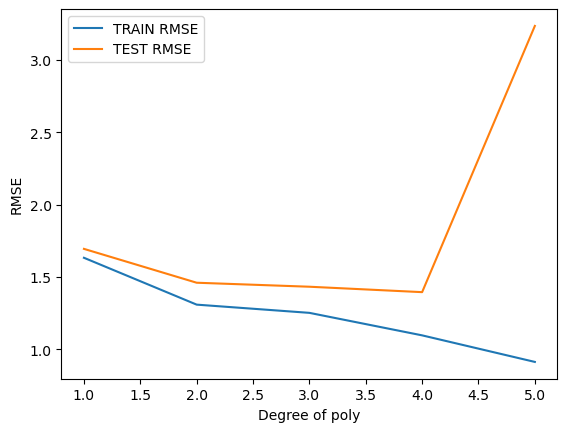

In [127]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()

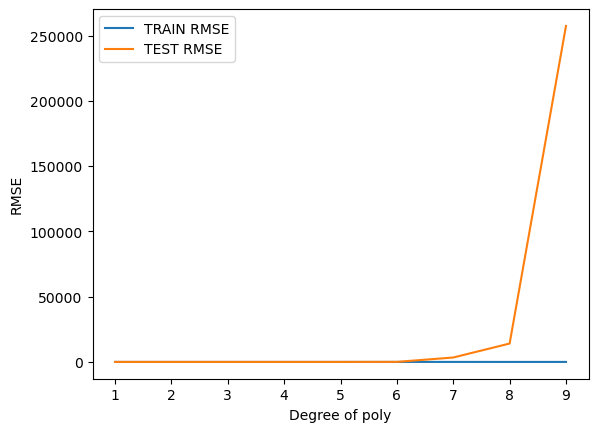

In [117]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()

In [129]:
# By above plot and test_rmse_errors and train_rmse_error whe cansee that third degree polynomia is best
# to fit model

In [135]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [137]:
final_model = LinearRegression()

In [143]:
full_poly_converted_x =final_poly_converter.fit_transform(X)

In [145]:
full_poly_converted_x

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [147]:
final_model.fit(full_poly_converted_x,y)

LinearRegression()

In [149]:
from joblib import dump,load

In [151]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [153]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [155]:
load_converter = load('final_converter.joblib')

In [157]:
load_converter

PolynomialFeatures(degree=3, include_bias=False)

In [163]:
loaded_model = load('final_poly_model.joblib')

In [165]:
load_converter

PolynomialFeatures(degree=3, include_bias=False)

In [167]:
#Ex.. 
campaign = [[149,22,12]]

In [171]:
trasfrom_data = load_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [173]:
load_converter.fit_transform(campaign).shape

(1, 19)

In [179]:
trasfrom_data = load_converter.fit_transform(campaign)

In [181]:
trasfrom_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [183]:
loaded_model.predict(trasfrom_data)

array([15.62388499])